Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading The Dataset

In [ ]:
df=pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Exploratory Data Analysis

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [ ]:
df.dropna()
df.shape

(6234, 12)

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])
df['day_added']=df['date_added'].dt.day
df['month_added']=df['date_added'].dt.month
df['year_added']=df['date_added'].dt.year

ValueError: time data " September 9, 2018" doesn't match format "%B %d, %Y", at position 1137. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
movie=df[df['type']=='Movie']
tv=df[df['type']=='TV Shows']

# Data Visualization

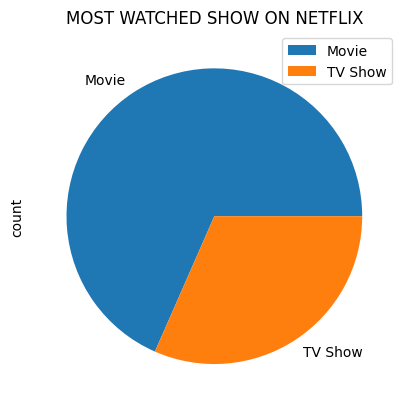

In [ ]:
df.type.value_counts().plot(kind='pie')
plt.title("MOST WATCHED SHOW ON NETFLIX")
plt.legend()
plt.show()

In [ ]:
df.director.value_counts().head()

director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
Name: count, dtype: int64

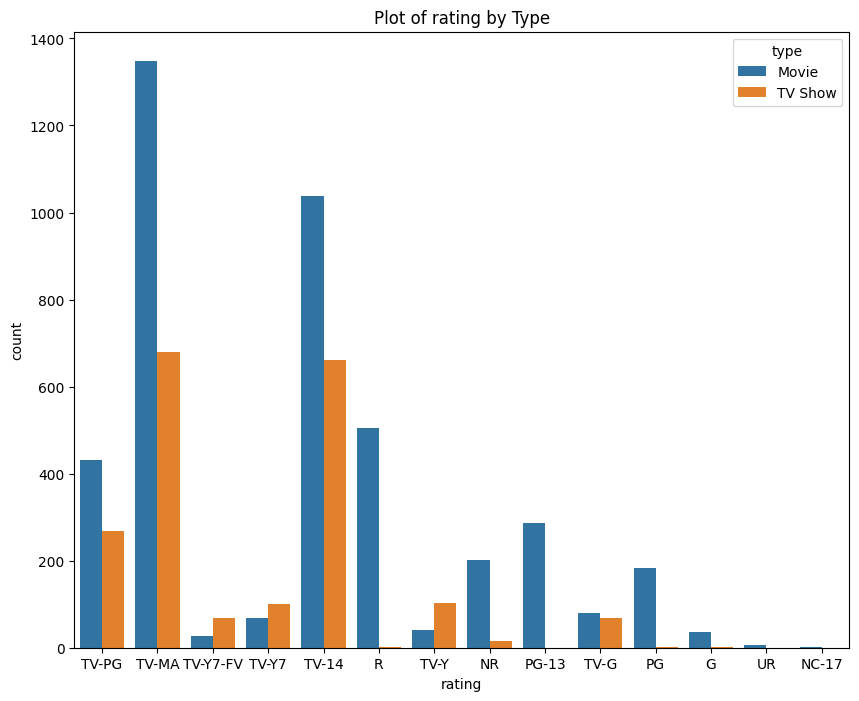

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title("Plot of rating by Type")
plt.show()

In [ ]:
df.country.value_counts()

United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: country, Length: 554, dtype: int64

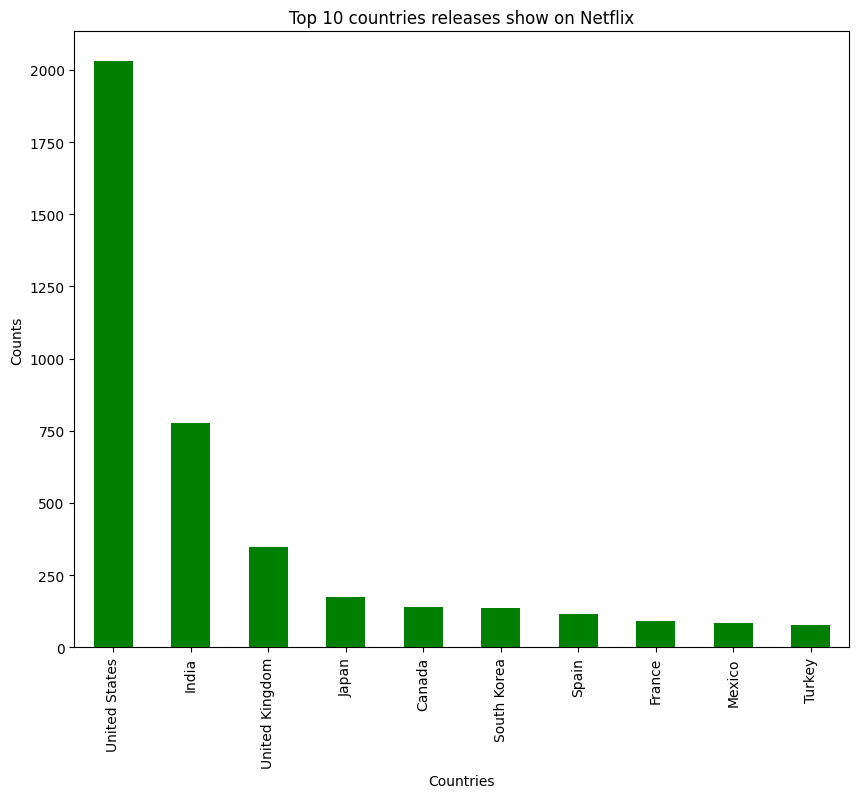

In [ ]:
plt.figure(figsize=(10,8))
df.country.value_counts().head(10).plot(kind='bar',color='green')
plt.title("Top 10 countries releases show on Netflix")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.show()


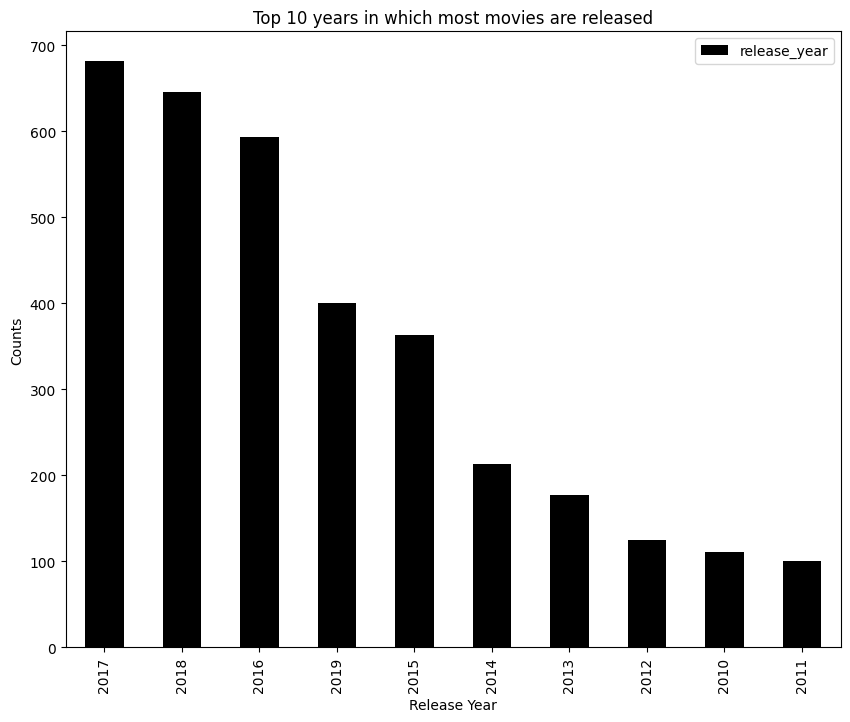

In [ ]:
plt.figure(figsize=(10,8))
movie.release_year.value_counts().head(10).plot(kind='bar',color='black')
plt.title('Top 10 years in which most movies are released')
plt.xlabel('Release Year')
plt.ylabel('Counts')
plt.legend()
plt.show()

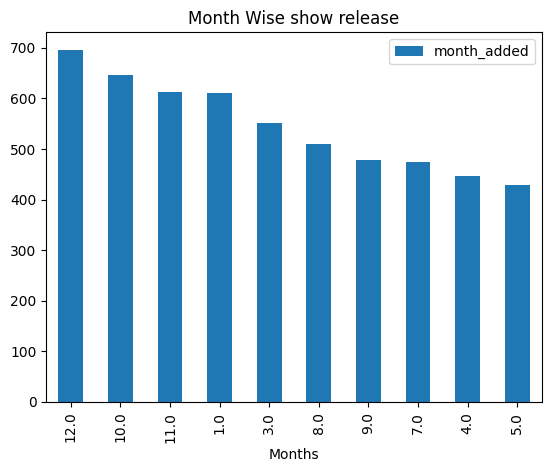

In [ ]:
df['month_added'].value_counts().head(10).plot(kind='bar')
plt.title("Month Wise show release")
plt.legend()
plt.xlabel("Months")
plt.show()

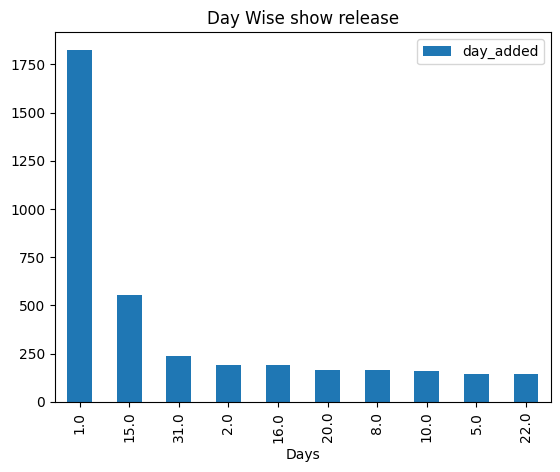

In [ ]:
df['day_added'].value_counts().head(10).plot(kind='bar')
plt.title("Day Wise show release")
plt.legend()
plt.xlabel("Days")
plt.show()

In [ ]:
lis=df.listed_in.value_counts()
lis

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Comedies, TV Dramas, TV Mysteries                  1
Classic Movies, Dramas, LGBTQ Movies                  1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy        1
Docuseries, Reality TV, Teen TV Shows                 1
Reality TV, Spanish-Language TV Shows                 1
Name: listed_in, Length: 461, dtype: int64

In [ ]:
print('Most common category of movie release\ndramas,international movies : ',max(lis))

Most common category of movie release
dramas,international movies :  299


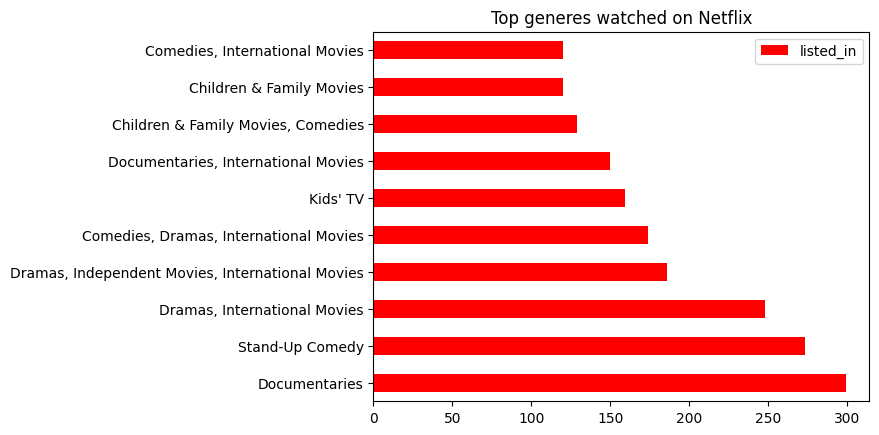

In [ ]:
lis.head(10).plot(kind='barh',color='r')
plt.title("Top generes watched on Netflix")
plt.legend()